In [1]:
%pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import RidgeCV, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [4]:
house = pd.read_csv("Housing.csv")

In [5]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Preprocessing

In [6]:
def findenull(house):
    print("null value:",house.isnull().sum())
    print("% null valuse",house.isnull().sum()/len(house)*100)
findenull(house)

null value: price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
% null valuse price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64


In [7]:
category = ['unfurnished','semi-furnished','furnished']
ohe = OneHotEncoder(sparse_output=False,drop='first')
le = OrdinalEncoder(categories=[category])
house[['mainroad','guestroom','basement','hotwaterheating',	'airconditioning','prefarea']] = ohe.fit_transform(house[['mainroad','guestroom','basement','hotwaterheating',	'airconditioning','prefarea']])
house[['furnishingstatus']] = le.fit_transform(house[['furnishingstatus']])

In [8]:
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,2.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,2.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,2.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1.0,0.0,1.0,0.0,0.0,2,0.0,0.0
541,1767150,2400,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0
542,1750000,3620,2,1,1,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0
543,1750000,2910,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,2.0


In [9]:
house.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [10]:
corr = house.corr()
corr['price'].sort_values(ascending=True)

hotwaterheating     0.093073
basement            0.187057
guestroom           0.255517
mainroad            0.296898
furnishingstatus    0.304721
prefarea            0.329777
bedrooms            0.366494
parking             0.384394
stories             0.420712
airconditioning     0.452954
bathrooms           0.517545
area                0.535997
price               1.000000
Name: price, dtype: float64

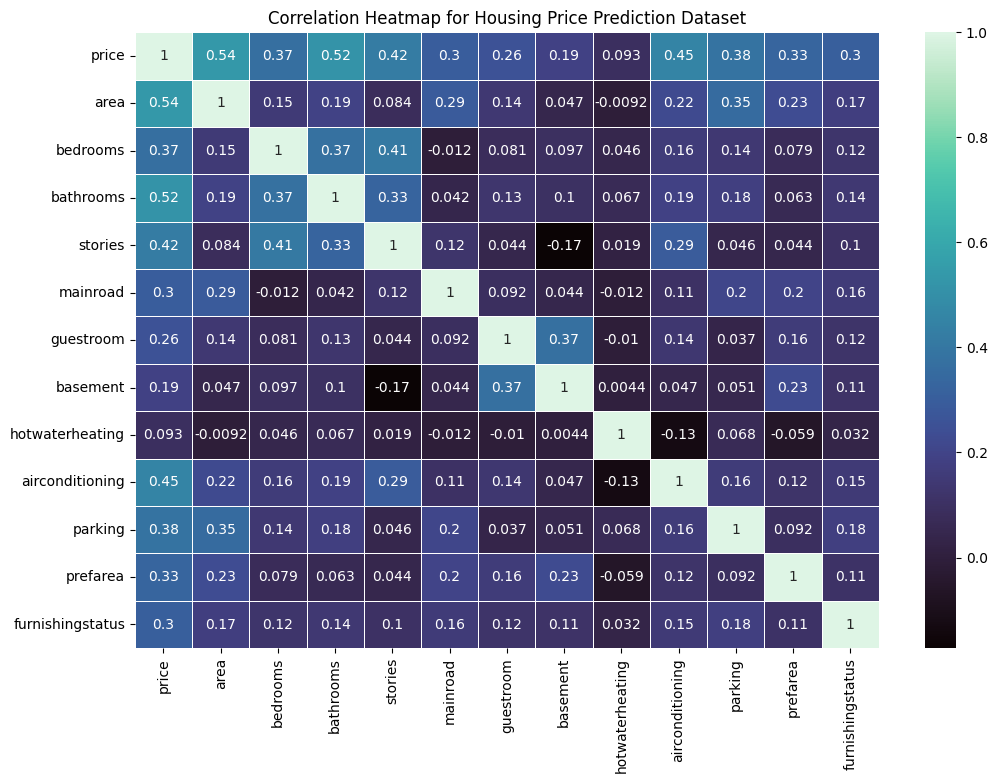

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(house.corr(), annot=True, cmap="mako", linewidths=0.5)
plt.title("Correlation Heatmap for Housing Price Prediction Dataset")
plt.show()

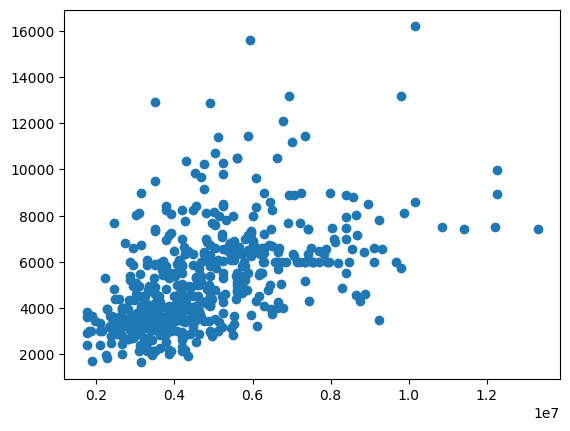

In [12]:
plt.scatter(house['price'],house['area'])

In [13]:
print(house['price'].corr(house['area']))

0.5359973457780788


In [14]:
from scipy.stats import normaltest
normaltest(house['price'])

NormaltestResult(statistic=np.float64(115.82550739373022), pvalue=np.float64(7.060096507152579e-26))

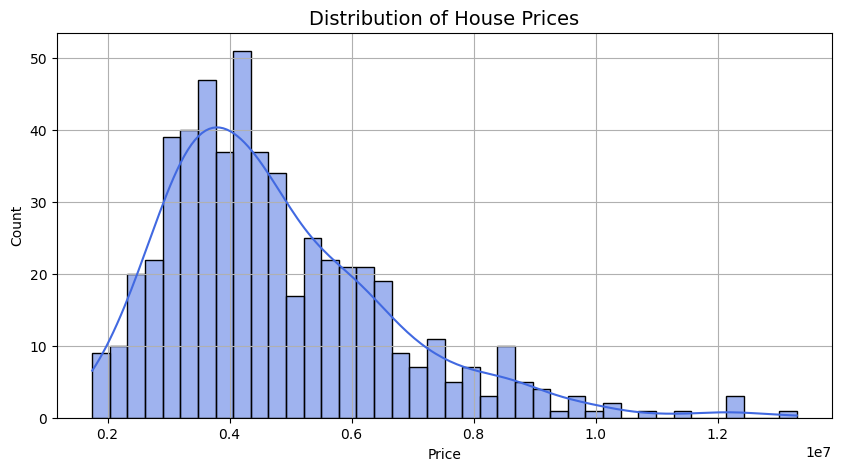

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(house['price'], bins=40, kde=True, color='royalblue')
plt.title('Distribution of House Prices', fontsize=14)
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)
plt.show()

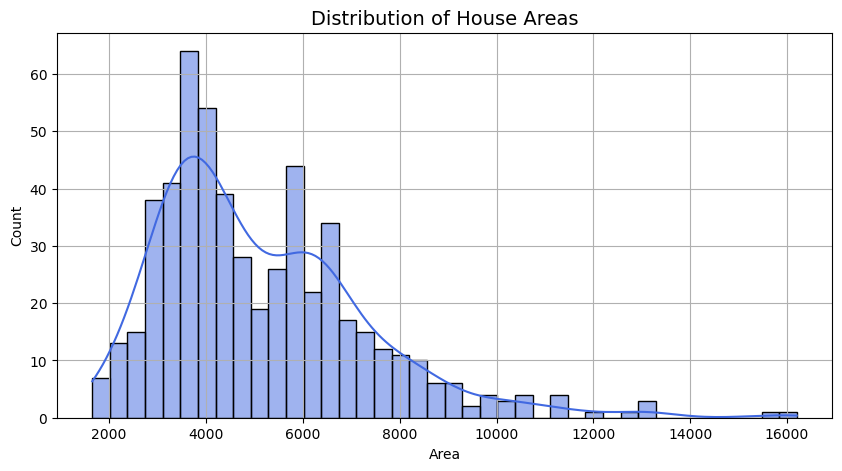

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(house['area'], bins=40, kde=True, color='royalblue')
plt.title('Distribution of House Areas', fontsize=14)
plt.xlabel('Area')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [17]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,2.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,2.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,2.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,2.0


In [18]:
data_num = house[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
data_cat = house[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']]

In [19]:
data_num

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [20]:
data_cat

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,2.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,1.0,0.0,1.0,1.0,2.0
4,1.0,1.0,1.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...
540,1.0,0.0,1.0,0.0,0.0,0.0,0.0
541,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1.0,0.0,0.0,0.0,0.0,0.0,0.0
543,0.0,0.0,0.0,0.0,0.0,0.0,2.0


0 price
1 area
2 bedrooms
3 bathrooms
4 stories
5 parking


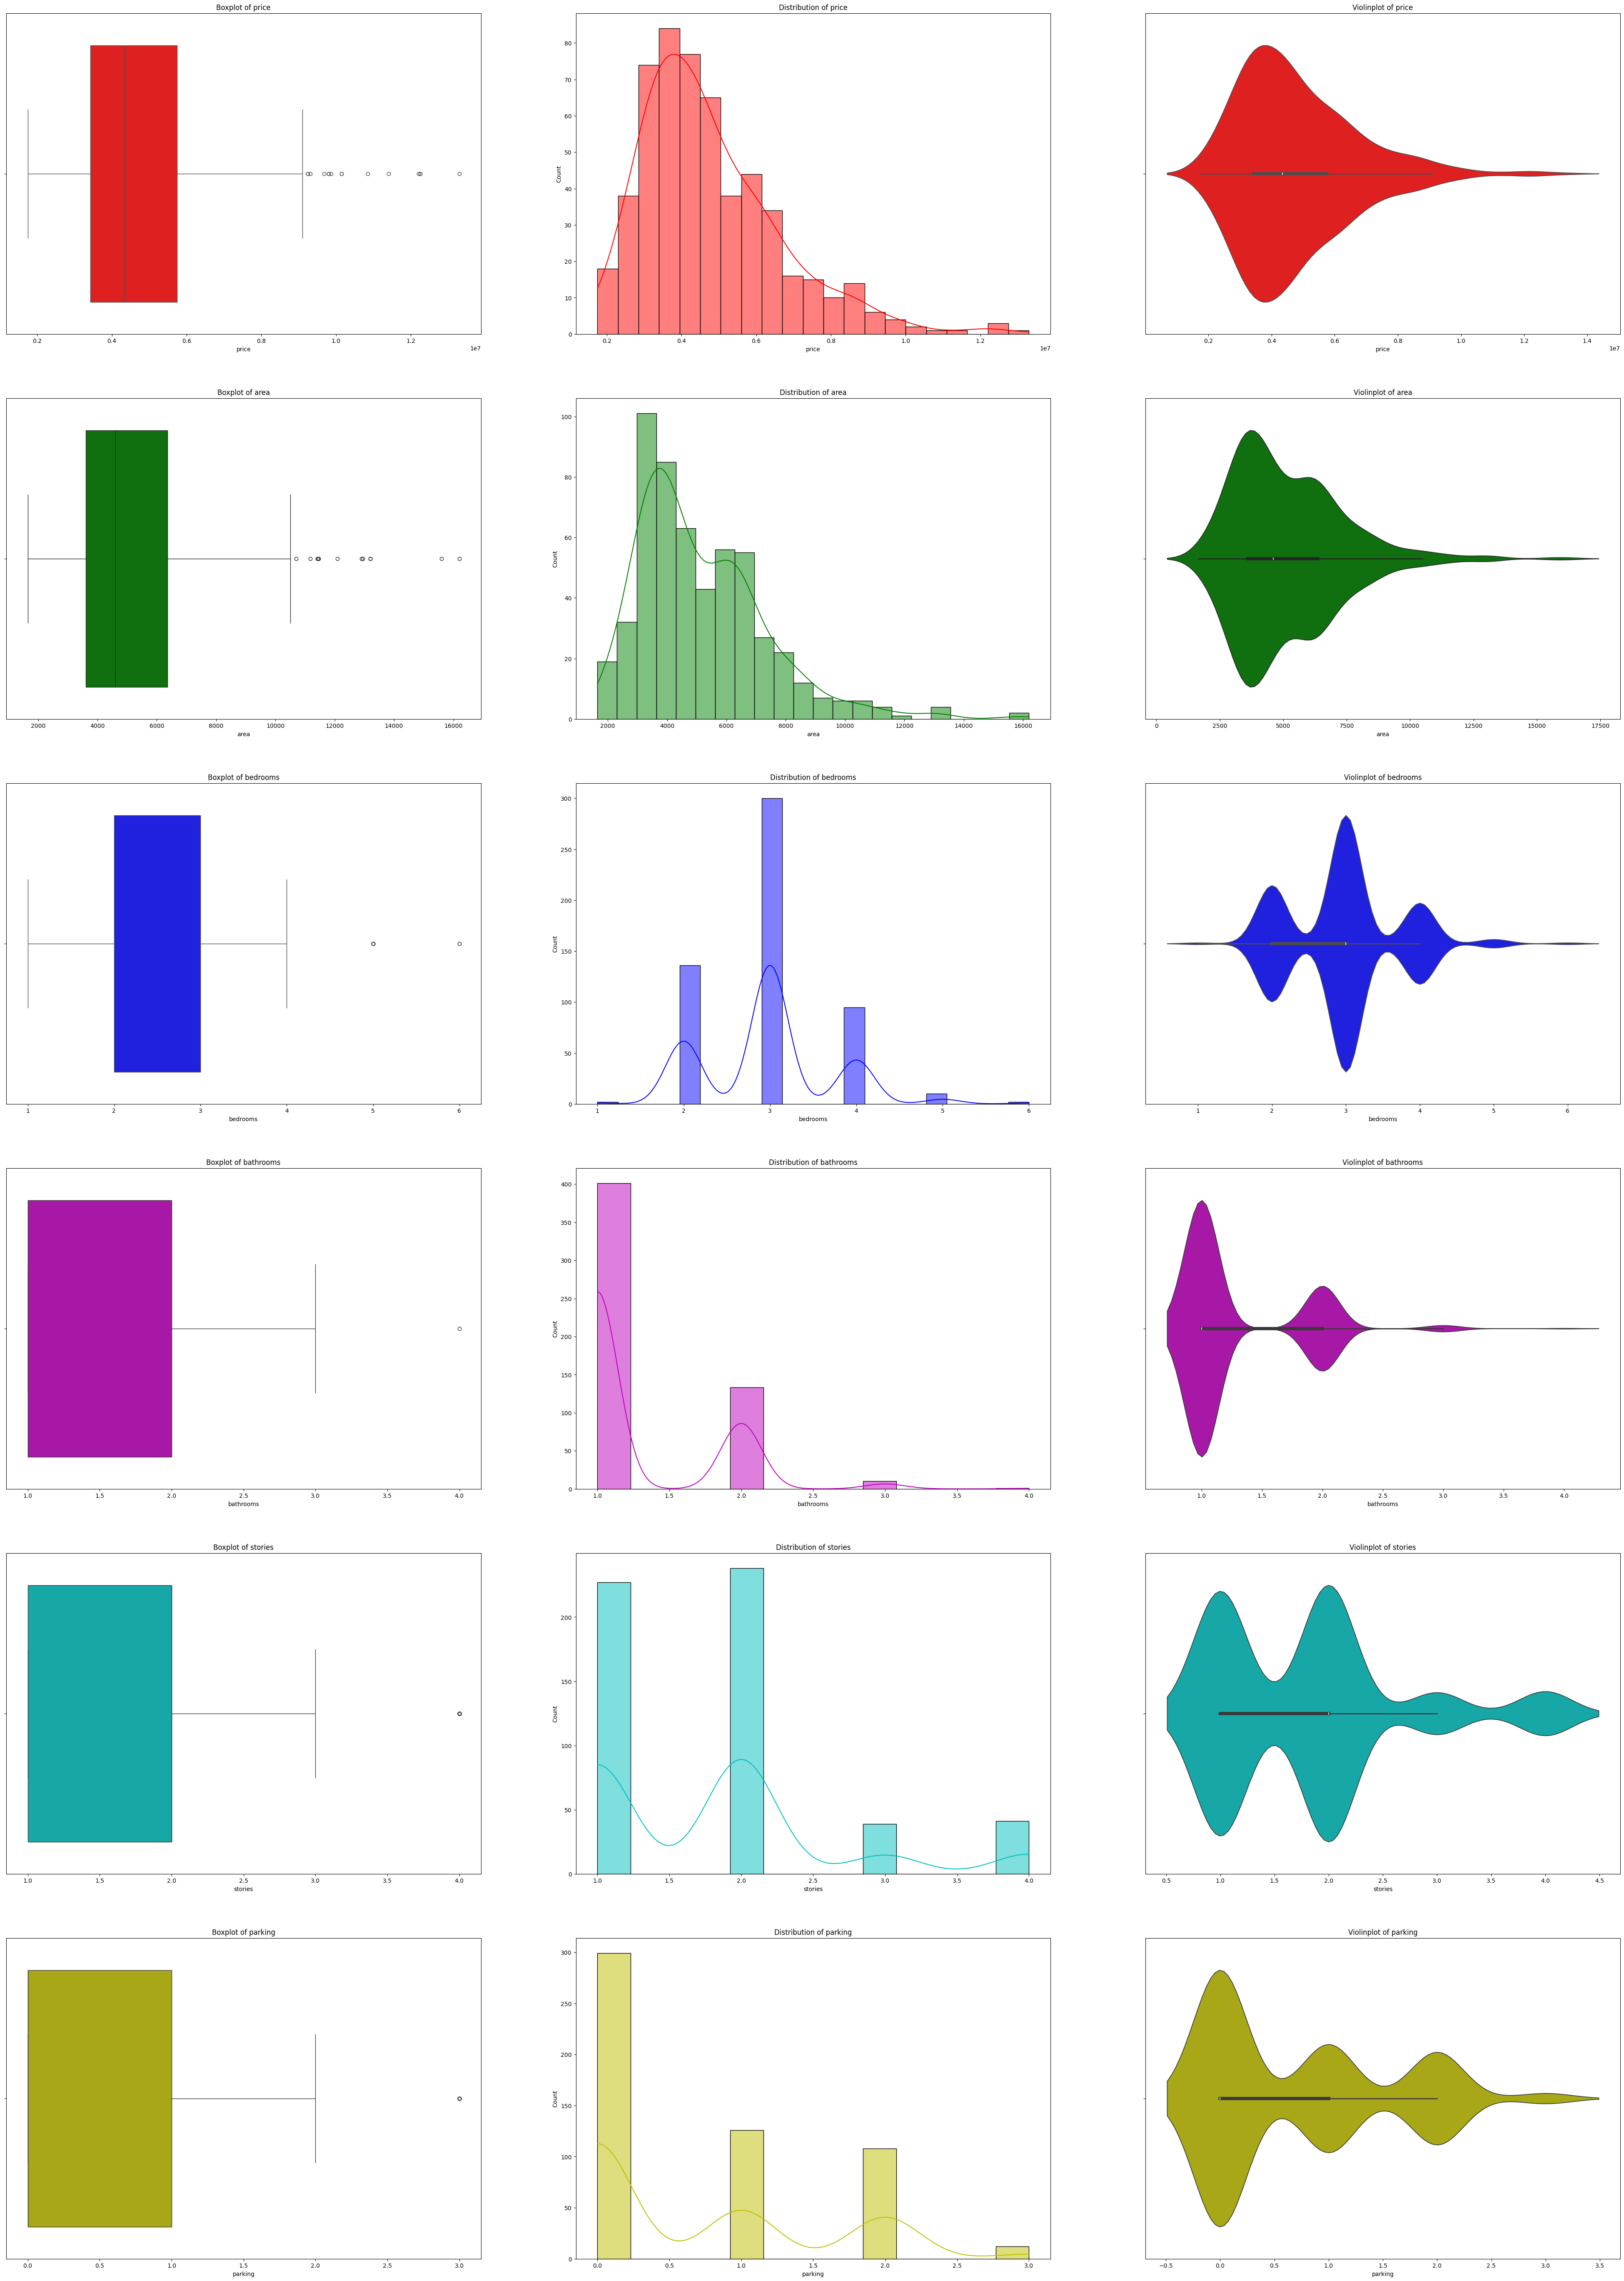

In [21]:
#Create boxplot, kde plot, and violin plot for each numeric features 
f, axes = plt.subplots(len(data_num.columns), 3, figsize=(50, 70))
colors = ["r", "g", "b", "m", "c" , "y"]
for i, var in enumerate(data_num.columns):
    sns.boxplot(data = data_num[var], orient = "h", color = colors[i], ax = axes[i,0])
    axes[i,0].set_title(f'Boxplot of {var}')
    sns.histplot(data = data_num[var], kde = True, color = colors[i], ax = axes[i,1])
    axes[i,1].set_title(f'Distribution of {var}')
    sns.violinplot(data = data_num[var], orient = "h", color = colors[i], ax = axes[i,2])
    axes[i,2].set_title(f'Violinplot of {var}')
    print(i, var)

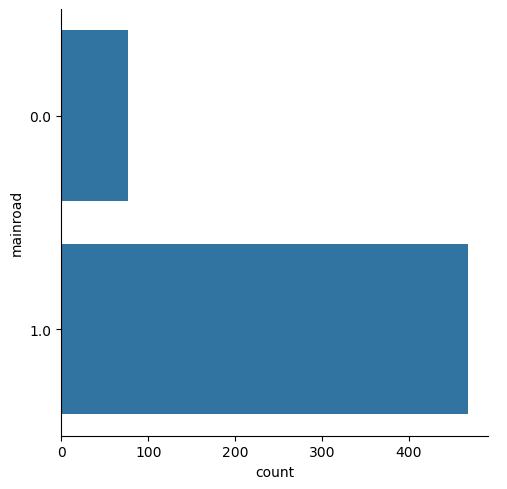

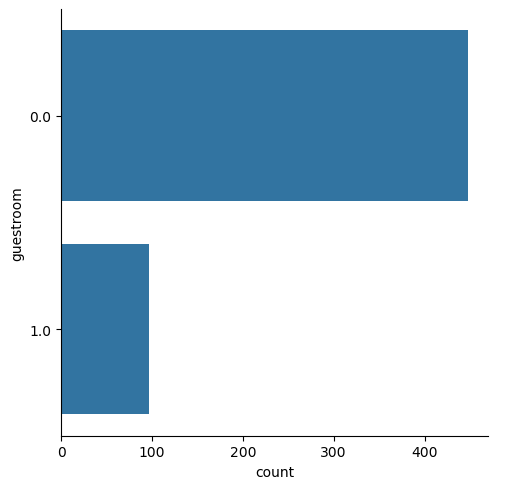

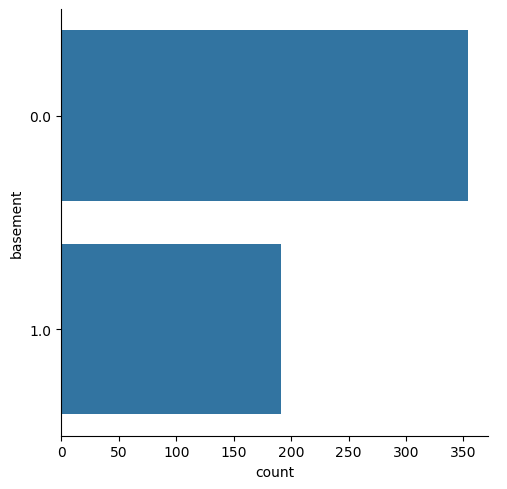

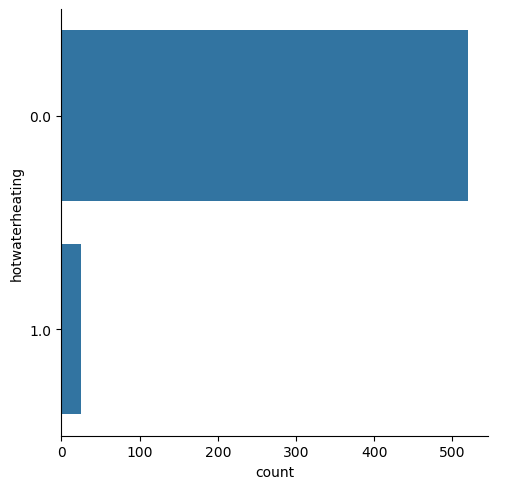

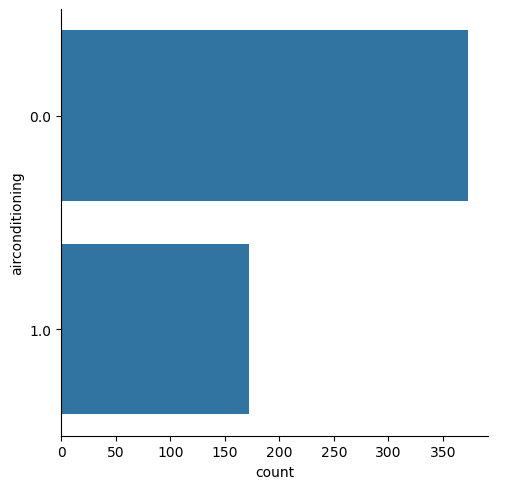

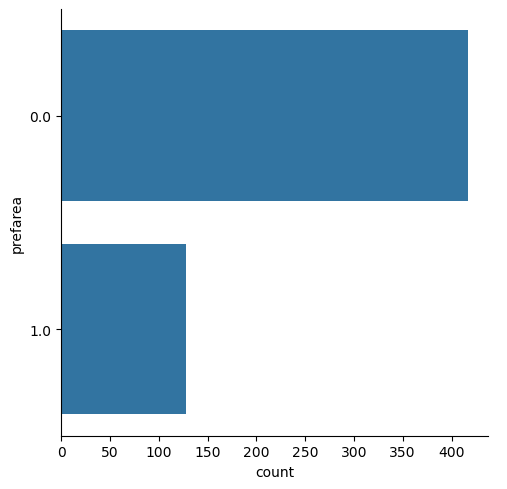

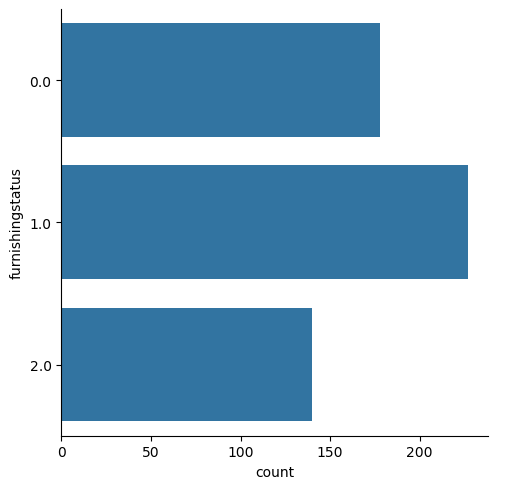

In [22]:
for var in data_cat.columns:
    sns.catplot(y = var, data = house, kind = "count")

In [23]:
X = house.drop(columns=['price'])
y = house['price']

In [24]:
X_train_init, X_test_init, y_train_init, y_test_init = train_test_split(X, y, test_size=0.3, random_state=32)

# Linear Regression 

In [25]:
scaler = StandardScaler()
lr = LinearRegression()

X_train_init = scaler.fit_transform(X_train_init)
X_test_init = scaler.transform(X_test_init)

lr.fit(X_train_init, y_train_init)

y_train_pred_init = lr.predict(X_train_init)
print("r2_score of train dataset:", r2_score(y_train_init, y_train_pred_init))

r2_score of train dataset: 0.6576426387743868


In [26]:
y_test_pred_init = lr.predict(X_test_init)
print("r2_score of test dataset:", r2_score(y_test_init, y_test_pred_init))

r2_score of test dataset: 0.7166965309942206


# Ridge Regression

In [27]:
alphas = np.logspace(-3, 2, 100)
rlr = RidgeCV(alphas=alphas, cv=5)
rlr.fit(X_train_init, y_train_init)

best_alpha = rlr.alpha_
print("This is the best alpha:", best_alpha)

print("R^2 score of the best model on train dataset:", rlr.score(X_train_init, y_train_init))

print("R^2 score of the best model on test dataset:", rlr.score(X_test_init, y_test_init))

This is the best alpha: 35.11191734215127
R^2 score of the best model on train dataset: 0.6562372843548734
R^2 score of the best model on test dataset: 0.7125446671465812


# Evaluation and Analysis

Q4: performed train/test split with test_size=0.2, random_state=42
Q4: RidgeCV best alpha = 21.5443

=== Q4 Comparison Table ===
          model     Test MSE  Test R²                                 CV MSE           CV R²
            OLS 1.771751e+12 0.649475 1042473212550.8298 ± 211167771325.2611 0.6610 ± 0.0467
Ridge (α=21.54) 1.830570e+12 0.637839 1058977993151.8499 ± 205869135702.7878 0.6545 ± 0.0551


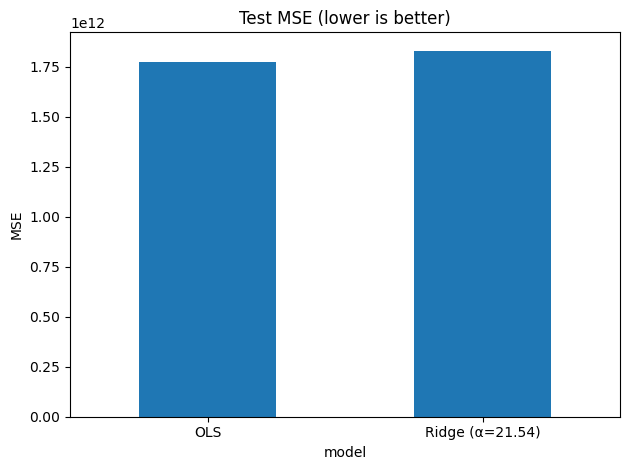

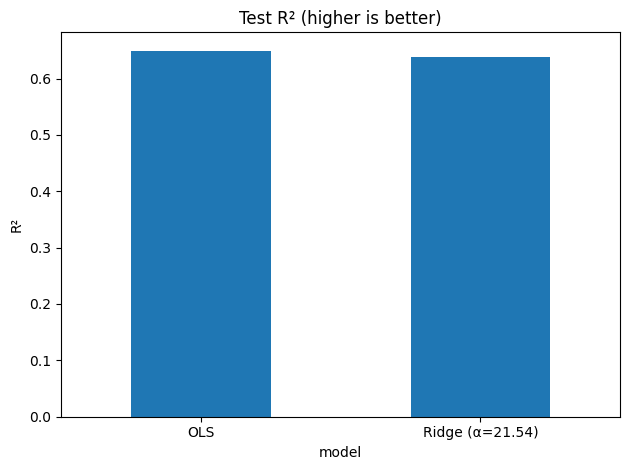

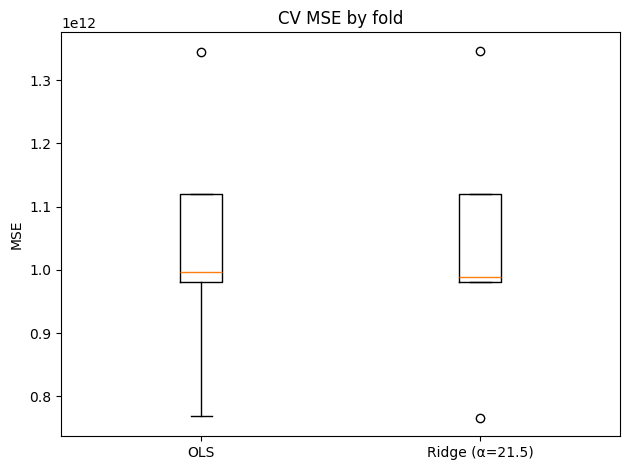


Saved: q4_results_table.csv


In [28]:
X = house.drop(columns=['price'])
y = house['price']
# --- 2) Train/test split (create only if not already present) ---
if not all(name in globals() for name in ["X_train", "X_test", "y_train", "y_test"]):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    print("Q4: performed train/test split with test_size=0.2, random_state=42")
else:
    print("Q4: using your existing X_train, X_test, y_train, y_test")

# --- 3) Shared CV splitter ---
RANDOM_STATE = 32
N_SPLITS = 5  # set to the k your assignment expects
kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)

# --- 4) Helpers: consistent evaluation with no leakage via Pipeline(StandardScaler -> Model) ---
def evaluate_with_cv_and_test(base_estimator):
    """
    Builds a pipeline with StandardScaler (fit ONLY on train inside each fold)
    + estimator, then returns CV metrics (mean ± std) and held-out test metrics.
    """
    pipe = Pipeline([
        #("scaler", StandardScaler()),
        ("est", base_estimator)
    ])

    # CV on TRAIN only
    scores = cross_validate(
        pipe, X_train, y_train,
        cv=kf,
        scoring=["r2", "neg_mean_squared_error"],
        return_estimator=False
    )
    cv_mse = -scores["test_neg_mean_squared_error"]
    cv_r2  =  scores["test_r2"]

    # Fit on full TRAIN and evaluate on TEST
    pipe.fit(X_train, y_train)
    y_pred_test = pipe.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_r2  = r2_score(y_test, y_pred_test)

    return {
        "cv_mse_mean": float(np.mean(cv_mse)),
        "cv_mse_std":  float(np.std(cv_mse, ddof=1)) if len(cv_mse) > 1 else 0.0,
        "cv_r2_mean":  float(np.mean(cv_r2)),
        "cv_r2_std":   float(np.std(cv_r2, ddof=1)) if len(cv_r2) > 1 else 0.0,
        "test_mse":    float(test_mse),
        "test_r2":     float(test_r2)
    }

# --- 5) Model A: OLS (Linear Regression) ---
ols_results = evaluate_with_cv_and_test(LinearRegression())

# --- 6) Model B: Ridge with alpha tuned by CV ---
# First, select alpha using RidgeCV inside a Pipeline to match preprocessing
alpha_grid = np.logspace(-4, 4, 25)
ridgecv = Pipeline([
    ("scaler", StandardScaler()),
    ("ridgecv", RidgeCV(alphas=alpha_grid, scoring="neg_mean_squared_error"))
])
ridgecv.fit(X_train, y_train)
best_alpha = float(ridgecv.named_steps["ridgecv"].alpha_)
print(f"Q4: RidgeCV best alpha = {best_alpha:.6g}")

ridge_results = evaluate_with_cv_and_test(Ridge(alpha=best_alpha))

# --- 7) Build the required comparison table ---
results_df = pd.DataFrame([
    {"model": "OLS", **ols_results},
    {"model": f"Ridge (α={best_alpha:.4g})", **ridge_results}
])[
    ["model", "test_mse", "test_r2", "cv_mse_mean", "cv_mse_std", "cv_r2_mean", "cv_r2_std"]
]

def pm(mean, std, decimals=4):
    return f"{mean:.{decimals}f} ± {std:.{decimals}f}"

display_df = results_df.copy()
display_df["CV MSE"] = [pm(m, s) for m, s in zip(display_df["cv_mse_mean"], display_df["cv_mse_std"])]
display_df["CV R²"]  = [pm(m, s) for m, s in zip(display_df["cv_r2_mean"], display_df["cv_r2_std"])]
display_df = display_df[["model", "test_mse", "test_r2", "CV MSE", "CV R²"]].rename(
    columns={"test_mse": "Test MSE", "test_r2": "Test R²"}
)

print("\n=== Q4 Comparison Table ===")
print(display_df.to_string(index=False))

# --- 8) Plots (optional but recommended) ---
# Test-set bars
plt.figure()
results_df.set_index("model")["test_mse"].plot(kind="bar", rot=0)
plt.title("Test MSE (lower is better)")
plt.ylabel("MSE")
plt.tight_layout()
plt.show()

plt.figure()
results_df.set_index("model")["test_r2"].plot(kind="bar", rot=0)
plt.title("Test R² (higher is better)")
plt.ylabel("R²")
plt.tight_layout()
plt.show()

# CV stability per fold: recompute per-fold MSEs explicitly for OLS and Ridge(best α)
def fold_mses(estimator):
    pipe = Pipeline([("scaler", StandardScaler()), ("est", estimator)])
    fold_vals = []
    for tr_idx, va_idx in kf.split(X_train, y_train):
        Xtr, Xva = X_train[tr_idx], X_train[va_idx] if isinstance(X_train, np.ndarray) else (X_train.iloc[tr_idx], X_train.iloc[va_idx])
        ytr, yva = y_train[tr_idx], y_train[va_idx]
        pipe.fit(Xtr, ytr)
        yp = pipe.predict(Xva)
        fold_vals.append(mean_squared_error(yva, yp))
    return np.array(fold_vals)

# Ensure arrays for indexing
X_train = np.asarray(X_train)
y_train = np.asarray(y_train).ravel()

ols_mses   = fold_mses(LinearRegression())
ridge_mses = fold_mses(Ridge(alpha=best_alpha))

plt.figure()
plt.boxplot([ols_mses, ridge_mses], labels=["OLS", f"Ridge (α={best_alpha:.3g})"])
plt.title("CV MSE by fold")
plt.ylabel("MSE")
plt.tight_layout()
plt.show()

# --- 9) Save deliverables ---
display_df.to_csv("q4_results_table.csv", index=False)
print("\nSaved: q4_results_table.csv")

# Improvement

In [29]:
house['price_trans'] = np.log(house['price'])
house['area_trans'] = np.log(house['area'])
new_house = house.drop(columns=['price', 'area'])
new_house

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_trans,area_trans
0,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,2.0,16.403275,8.911934
1,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,2.0,16.321036,9.100526
2,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0,16.321036,9.206332
3,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,2.0,16.318175,8.922658
4,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,2.0,16.250001,8.911934
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,2,1,1,1.0,0.0,1.0,0.0,0.0,2,0.0,0.0,14.414347,8.006368
541,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,14.384879,7.783224
542,2,1,1,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,14.375126,8.194229
543,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,2.0,14.375126,7.975908


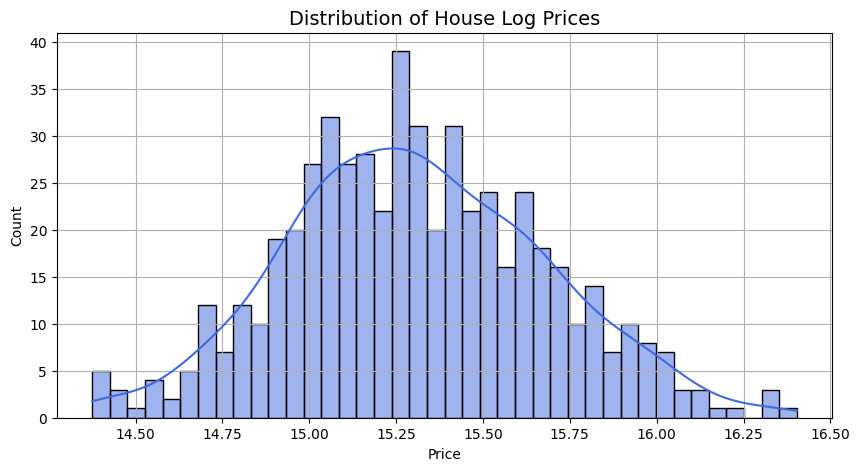

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(new_house['price_trans'], bins=40, kde=True, color='royalblue')
plt.title('Distribution of House Log Prices', fontsize=14)
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)
plt.show()

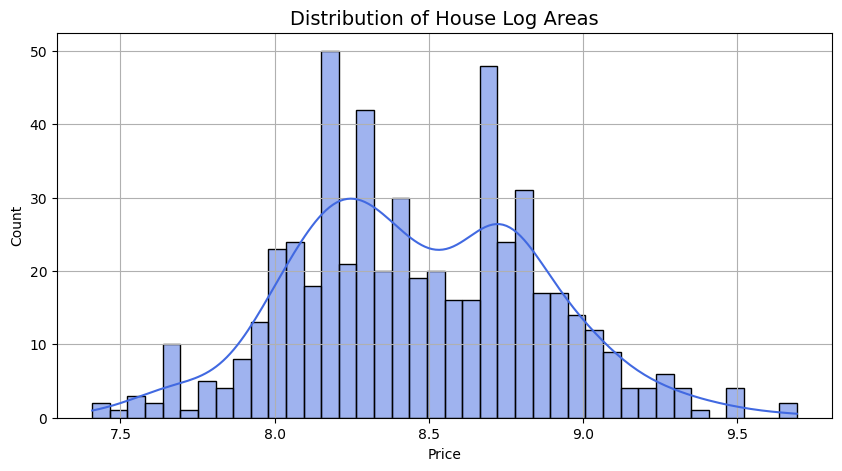

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(new_house['area_trans'], bins=40, kde=True, color='royalblue')
plt.title('Distribution of House Log Areas', fontsize=14)
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)
plt.show()

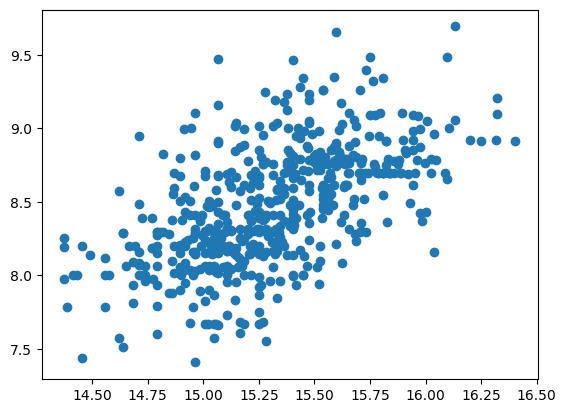

In [32]:
plt.scatter(x=new_house['price_trans'],y=house['area_trans'])

In [33]:
print(house['price_trans'].corr(house['area_trans']))

0.5800853916978138


In [34]:
X = new_house.drop(columns=['price_trans'])
y = new_house['price_trans']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((381, 12), (164, 12), (381,), (164,))

# Linear Regression

In [36]:
scaler = StandardScaler()
lr = LinearRegression()

In [37]:
X_train_scaler = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [38]:
lr = LinearRegression()

lr.fit(X_train_scaler,y_train)

y_pred = lr.predict(X_test_scale)
print("r2_score:",r2_score(y_test,y_pred))

r2_score: 0.7131569359343365


In [39]:
y_pred_train = lr.predict(X_train_scaler)
print("r2_score:",r2_score(y_train,y_pred_train))

r2_score: 0.6882361239819863


Text(0, 0.5, 'predicted_price')

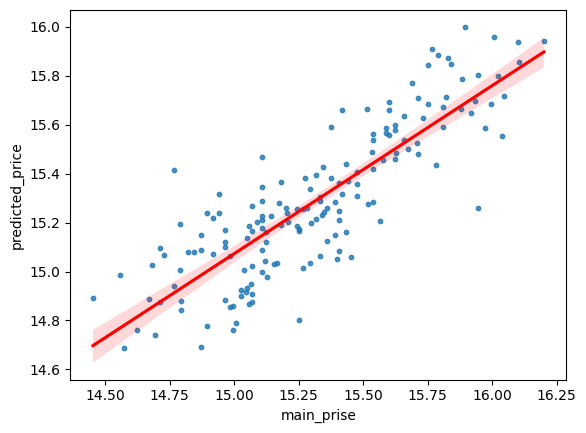

In [40]:
sns.regplot(x=y_test,y=y_pred,line_kws={'color':'red'},scatter_kws={'s':10})
plt.xlabel('main_prise')
plt.ylabel('predicted_price')

# Ridge Regression

In [41]:
alphas = np.logspace(-3, 2, 100)
rlr = RidgeCV(alphas=alphas, cv=5)
rlr.fit(X_train_scaler, y_train)

best_alpha = rlr.alpha_
print("This is the best alpha:", best_alpha)

print("R^2 score of the best model on train dataset:", rlr.score(X_train_scaler, y_train))
 
print("R^2 score of the best model on test dataset:", rlr.score(X_test_scale, y_test))

This is the best alpha: 27.825594022071257
R^2 score of the best model on train dataset: 0.687252028645962
R^2 score of the best model on test dataset: 0.7121520653957033


Text(0, 0.5, 'predicted_price')

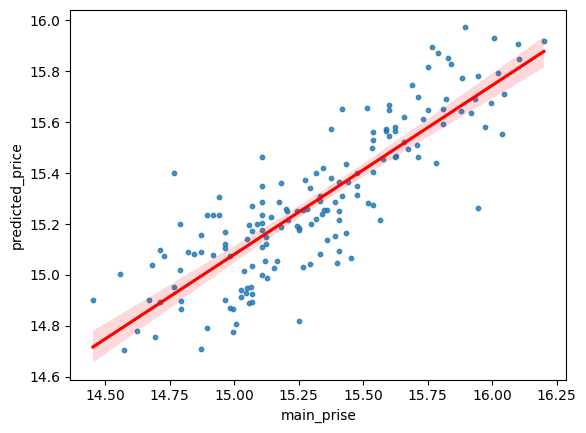

In [42]:
sns.regplot(x=y_test,y=rlr.predict(X_test_scale),line_kws={'color':'red'},scatter_kws={'s':10})
plt.xlabel('main_prise')
plt.ylabel('predicted_price')